# Color scale calculations

Colorscale generated from: https://gka.github.io/palettes/#colors=#ff7d00,#007fff|steps=100|bez=1|coL=1

Now reverse-engineering the algorithm

In [1]:
colors_string = """#ff7d00 #fe7d09 #fd7d0f #fc7d16 #fc7d1b #fa7d20 #f97d25 #f97d29 #f77d2c #f77d30 #f57d33 #f57d36 #f37d3c #f37d3c #f27c3e #f27c3f #f07c42 #f07c44 #ee7c47 #ed7c49 #ec7c4c #eb7c4e #eb7c51 #e97c55 #e87c57 #e77c58 #e67c5c #e47c5e #e37c60 #e27c62 #e17c65 #e07c68 #de7c6a #dd7c6c #dc7c6e #da7c71 #da7c73 #d87c75 #d77c77 #d57c7a #d47c7c #d37c7d #d27c80 #d17c82 #d07c84 #ce7c87 #cd7c89 #cb7c8b #ca7c8d #c87c90 #c77c90 #c57c94 #c47c96 #c17c99 #c17c9a #bf7c9c #be7c9e #bc7c9f #b97ca3 #b87ca4 #b67ca7 #b47ca9 #b37cab #b27cad #af7caf #ad7cb1 #a97db7 #a67dba #a47dbc #a27dbe #a17dbf #9e7dc1 #9c7dc3 #9a7dc5 #977dc8 #967dc9 #927dcb #8f7dce #8e7dcf #8c7dd1 #897dd3 #867dd5 #837dd7 #807dd9 #777edf #737ee1 #717ee3 #6c7ee5 #6a7ee6 #667ee8 #617eeb #5d7eec #597eee #547ef0 #4e7ef2 #3a7ff8 #347ff9 #277ffc #1c7ffd #007fff"""

In [2]:
%pylab --no-import-all inline

# Solarize_Light2, bmh, ggplot, seaborn, seaborn-whitegrid, seaborn-notebook
plt.style.use('seaborn-notebook')
plt.rc('figure', figsize=(11, 6))

Populating the interactive namespace from numpy and matplotlib


## Colorspace from website

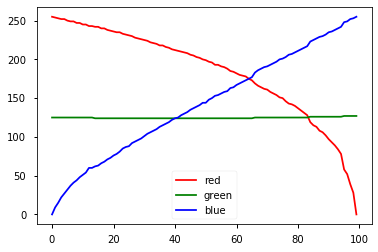

In [3]:
rgb = np.array([[int(c[1:3], 16), int(c[3:5], 16), int(c[5:7], 16)] for c in colors_string.split()])

fig, ax = plt.subplots()

ax.plot(rgb[:,0], 'r', label='red')
ax.plot(rgb[:,1], 'g', label='green')
ax.plot(rgb[:,2], 'b', label='blue')
ax.legend();

In [4]:
def show_cmaps(name2cmap_dict):
    n = len(name2cmap_dict)
    fig, axes = plt.subplots(n, 1, figsize=(11, n), squeeze=False)
    fig.subplots_adjust(bottom=0.5)

    for i, (name, cmap) in enumerate(name2cmap_dict.items()):
        axis = axes[i, 0]
        cb = matplotlib.colorbar.ColorbarBase(axis, cmap=cmap, orientation='horizontal')
        
        pos = list(axis.get_position().bounds)
        plt.gcf().text(pos[0] - 0.02, pos[1] + 0.01, 
                       name, fontsize=10, horizontalalignment='right')

In [5]:
cmaps = {}

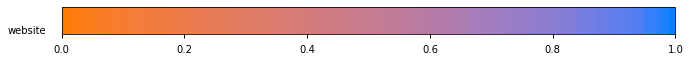

In [6]:
rgb1 = rgb / 255.0
cmap = matplotlib.colors.ListedColormap(rgb1)
cmaps['website'] = cmap
show_cmaps(cmaps)

## Naive approach in RGB colorspace

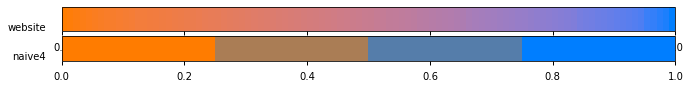

In [7]:
n2 = 2

red = np.linspace(0, 255, 2*n2)[::-1]
#  green = np.concatenate((np.linspace(0, 125, n2)[::-1], np.linspace(0, 125, n2)))
green = np.linspace(124, 126, 2*n2)
blue = np.linspace(0, 255, 2*n2)
colors = [(r/255, g/255, b/255) for (r, g, b) in zip(red, green, blue)]

cmap = matplotlib.colors.ListedColormap(colors)
cmaps['naive4'] = cmap

show_cmaps(cmaps)

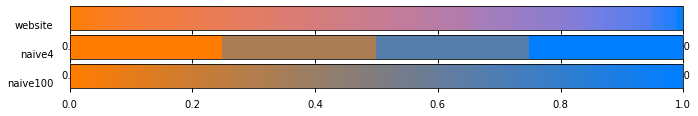

In [8]:
n2 = 50

red = np.linspace(0, 255, 2*n2)[::-1]
#  green = np.concatenate((np.linspace(0, 125, n2)[::-1], np.linspace(0, 125, n2)))
green = np.linspace(124, 126, 2*n2)
blue = np.linspace(0, 255, 2*n2)
colors = np.array([(r/255, g/255, b/255) for (r, g, b) in zip(red, green, blue)])

cmap = matplotlib.colors.ListedColormap(colors)
cmaps['naive100'] = cmap

naive_colors = colors
show_cmaps(cmaps)

## Polynomial approximation of colorspace from website

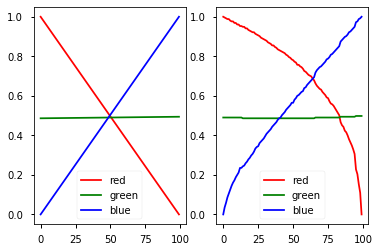

In [9]:
fig, axes = plt.subplots(1, 2)

ax = axes[0]
ax.plot(naive_colors[:,0], 'r', label='red')
ax.plot(naive_colors[:,1], 'g', label='green')
ax.plot(naive_colors[:,2], 'b', label='blue')
ax.legend()

ax = axes[1]
ax.plot(rgb1[:,0], 'r', label='red')
ax.plot(rgb1[:,1], 'g', label='green')
ax.plot(rgb1[:,2], 'b', label='blue')
ax.legend();

In [10]:
x = np.linspace(0, 1, rgb1.shape[0])

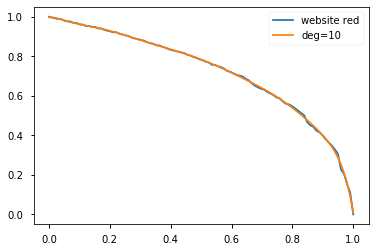

In [11]:
fig, ax = plt.subplots()
ax.plot(x, rgb1[:, 0], label='website red')

for deg in [10]:
# for deg in [2, 3, 6, 10]:
    coeffs = np.polyfit(x, rgb1[:, 0], deg=deg)

    poly = np.poly1d(coeffs)
    ax.plot(x, poly(x), label='deg=%d' % deg)
ax.legend();

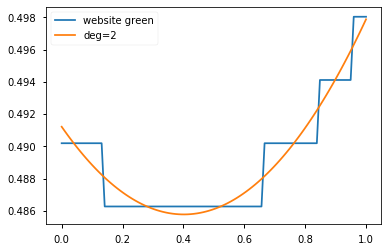

In [12]:
fig, ax = plt.subplots()
ax.plot(x, rgb1[:, 1], label='website green')

for deg in [2]:
# for deg in [2, 3, 6, 10]:
    coeffs = np.polyfit(x, rgb1[:, 1], deg=deg)

    poly = np.poly1d(coeffs)
    ax.plot(x, poly(x), label='deg=%d' % deg)
ax.legend();

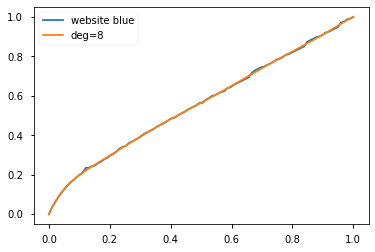

In [13]:
fig, ax = plt.subplots()
ax.plot(x, rgb1[:, 2], label='website blue')

for deg in [8]:
# for deg in [2, 3, 6, 10]:
    coeffs = np.polyfit(x, rgb1[:, 2], deg=deg)

    poly = np.poly1d(coeffs)
    ax.plot(x, poly(x), label='deg=%d' % deg)
ax.legend();

In [14]:
coeffs_r = np.polyfit(x, rgb1[:, 0], deg=10)
coeffs_g = np.polyfit(x, rgb1[:, 1], deg=2)
coeffs_b = np.polyfit(x, rgb1[:, 2], deg=10)

coeffs_r, coeffs_g, coeffs_b

(array([-1.88412596e+03,  8.95667524e+03, -1.81376375e+04,  2.03770286e+04,
        -1.38569174e+04,  5.83634555e+03, -1.49526024e+03,  2.19083223e+02,
        -1.62993086e+01,  1.18828327e-01,  9.97272731e-01]),
 array([ 0.03375976, -0.02709931,  0.49121996]),
 array([ 5.01820687e+02, -2.59243780e+03,  5.62407510e+03, -6.61008958e+03,
         4.50051116e+03, -1.72294676e+03,  2.95074960e+02,  1.72710195e+01,
        -1.54719611e+01,  3.19380620e+00,  1.52753236e-03]))

## Linear in CIELAB colorspace

In [15]:
# conversions between colorspaces: sRGB<->XYZ, XYZ<->CIELAB
# sRGB: https://en.wikipedia.org/wiki/SRGB#The_reverse_transformation
# XYZ: https://en.wikipedia.org/wiki/CIE_1931_color_space
# CIELAB: https://en.wikipedia.org/wiki/CIELAB_color_space#CIELAB%E2%80%93CIEXYZ_conversions

# Common assumptions:
# - data is in 3-column matrices, so a whole color is in one row
# - sRGB is in range (0, 1)
# - XYZ is in range (0, 1), and is D65 10deg

def rgb_to_xyz(rgb):
    rgb = np.asarray(rgb)
    # inverse gamma correction
    def igamma(_u):
        u = np.copy(_u)
        mask = u <= 0.04045
        u[mask] /= 12.92
        u[~mask] = ((u[~mask] + 0.055) / 1.055)**2.4
        return u
        
    rgb_linear = igamma(rgb)
    
    conv_matrix = np.array([
        [0.4124, 0.3576, 0.1805],
        [0.2126, 0.7152, 0.0722],
        [0.0193, 0.1192, 0.9504]
    ])
    
    xyz = (conv_matrix @ rgb_linear.T).T
    # same as:
    assert np.all(xyz == rgb_linear @ conv_matrix.T)
    
    return np.clip(xyz, 0, 1)
    
def xyz_to_rgb(xyz):
    xyz = np.asarray(xyz)
    
    conv_matrix = np.array([
        [ 3.2406, -1.5372, -0.4986],
        [-0.9689,  1.8758,  0.0415],
        [ 0.0557, -0.2040,  1.0570]
    ])
    # to obtain values 
    rgb_linear = (conv_matrix @ xyz.T).T
    # same as:
    assert np.all(rgb_linear == xyz @ conv_matrix.T)
    
    # gamma correction
    def gamma(_u):
        u = np.copy(_u)
        mask = u <= 0.0031308
        u[mask] *= 12.92
        u[~mask] = 1.055 * u[~mask]**(1/2.4) - 0.055
        return u
    
    rgb = gamma(rgb_linear)
    return np.clip(rgb, 0, 1)


Xn, Yn, Zn = 0.950489, 1.0, 1.088840

def xyz_to_lab(xyz):
    xyz = np.asarray(xyz)
    
    def f(_t):
        t = np.copy(_t)
        delta = 6.0 / 29
        mask = t > delta**3
        t[mask] = t[mask]**(1/3)
        t[~mask] = t[~mask] / (3 * delta**2) + 4/29
        return t
    
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    
    L = 116 * f(y / Yn) - 16
    a = 500 * (f(x / Xn) - f(y / Yn))
    b = 200 * (f(y / Yn) - f(z / Zn))
    
    lab = np.column_stack((L, a, b))
    return lab
    
def lab_to_xyz(lab):
    lab = np.asarray(lab)
    
    def inv_f(_t):
        t = np.copy(_t)
        delta = 6.0 / 29
        mask = t > delta
        t[mask] = t[mask]**3
        t[~mask] = 3 * delta**2 * (t[~mask] - 4/29)
        return t

    L, a, b = lab[:, 0], lab[:, 1], lab[:, 2]
    
    x = Xn * inv_f((L + 16) / 116 + a / 500)
    y = Yn * inv_f((L + 16) / 116)
    z = Zn * inv_f((L + 16) / 116 - b / 200)

    xyz = np.column_stack((x, y, z))
    return xyz

In [16]:
from_rgb = [1.0, 0.5, 0.0]  # orange
to_rgb = [0.0, 0.5, 1.0]    # blue

from_rgb = np.array([from_rgb])
to_rgb = np.array([to_rgb])

from_lab = xyz_to_lab(rgb_to_xyz(from_rgb))
to_lab = xyz_to_lab(rgb_to_xyz(to_rgb))

# linear interpolation in lab space
N = 100
l1, a1, b1 = from_lab.T  # cause it splits by rows
l2, a2, b2 = to_lab.T
ls = np.linspace
l, a, b = ls(l1, l2, N), ls(a1, a2, N), ls(b1, b2, N)

cspace_lab = np.column_stack((l, a, b))
cspace_rgb = xyz_to_rgb(lab_to_xyz(cspace_lab))

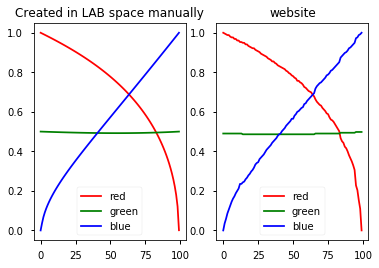

In [17]:
fig, axes = plt.subplots(1, 2)

ax = axes[0]
ax.plot(cspace_rgb[:,0], 'r', label='red')
ax.plot(cspace_rgb[:,1], 'g', label='green')
ax.plot(cspace_rgb[:,2], 'b', label='blue')
ax.legend()
ax.set_title('Created in LAB space manually')

ax = axes[1]
ax.plot(rgb1[:,0], 'r', label='red')
ax.plot(rgb1[:,1], 'g', label='green')
ax.plot(rgb1[:,2], 'b', label='blue')
ax.legend()
ax.set_title('website');

In [18]:
cmap = matplotlib.colors.ListedColormap(cspace_rgb)
cmaps['inLAB'] = cmap

# Resulting function 

In [19]:
def generate_colors(N):
    array = np.array
    coeffs_r, coeffs_g, coeffs_b = (array([-1.88412596e+03,  8.95667524e+03, -1.81376375e+04,  2.03770286e+04,
        -1.38569174e+04,  5.83634555e+03, -1.49526024e+03,  2.19083223e+02,
        -1.62993086e+01,  1.18828327e-01,  9.97272731e-01]),
 array([ 0.03375976, -0.02709931,  0.49121996]),
 array([ 5.01820687e+02, -2.59243780e+03,  5.62407510e+03, -6.61008958e+03,
         4.50051116e+03, -1.72294676e+03,  2.95074960e+02,  1.72710195e+01,
        -1.54719611e+01,  3.19380620e+00,  1.52753236e-03]))
    
    x = np.linspace(0, 1, N)
    r = np.poly1d(coeffs_r)(x)
    g = np.poly1d(coeffs_g)(x)    
    b = np.poly1d(coeffs_b)(x)

    # normalize red and blue so that they cover range (0, 1)
    r -= np.min(r)
    r /= np.max(r)
    b -= np.min(b)
    b /= np.max(b)
    
    rgb = np.vstack((r, g, b)).T
    return rgb

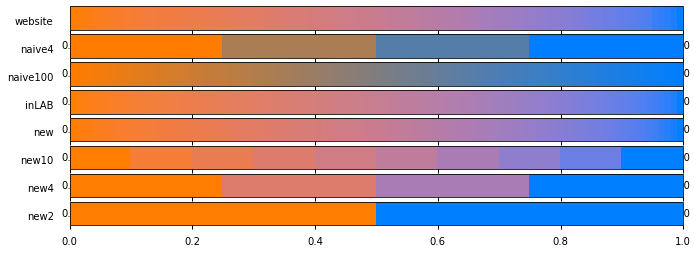

In [20]:
rgb_new = generate_colors(100)
rgb_new10 = generate_colors(10)
rgb_new4 = generate_colors(4)
rgb_new2 = generate_colors(2)

cmap = matplotlib.colors.ListedColormap(rgb_new)
cmaps['new'] = cmap
cmap = matplotlib.colors.ListedColormap(rgb_new10)
cmaps['new10'] = cmap
cmap = matplotlib.colors.ListedColormap(rgb_new4)
cmaps['new4'] = cmap
cmap = matplotlib.colors.ListedColormap(rgb_new2)
cmaps['new2'] = cmap

show_cmaps(cmaps)